In [1]:
import pandas as pd
import numpy as np
import re
# --------------------
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import math
import unidecode 

In [2]:
df = pd.read_csv('data_defi3.csv.gz',compression="gzip", sep=";")

In [3]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [4]:
# Modification possible to stop words
stop_word = ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient",
             "allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez",
             "attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai",
             "auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant",
             "autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais",
             "avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah",
             "bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce",
             "ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci",
             "celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces",
             "cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche",
             "chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic",
             "combien","comme","comment","comparable","comparables","compris","concernant","contre","couic",
             "crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere",
             "derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième",
             "deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent",
             "différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers",
             "diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont",
             "dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet",
             "egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]


In [5]:
# functions to change PLT to 0 and 1
chars = [4,4.1,4.2,5,5.1,5.2,5.3,6.3,6.4]
def clean_text_plt_0or1():
    for x in df['PLT']:
        if x not in chars:
            df['PLT'].replace(x, 0,inplace=True)
    for c in chars:
        df['PLT'].replace(c, 1,inplace=True)
    #df = df.apply(lambda x : math.floor(x))
    return df

In [6]:

df.dropna(inplace=True)
df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x : unidecode.unidecode(x)) # Remove é etc and ponctuation
df['PLT'] = df['PLT'].apply(lambda x : math.floor(x))
df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x : preprocess_text(x))
df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].str.lower()
df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
df = clean_text_plt_0or1()
df['Length'] = df['Avis.Pharmaceutique'].str.len()


In [7]:
df.groupby('PLT').describe()

Length                                                    
       count       mean        std  min   25%   50%   75%    max
PLT                                                             
0    19245.0  53.183996  30.917621  0.0  31.0  47.0  68.0  335.0
1     3896.0  47.955595  28.643824  0.0  29.0  41.0  62.0  210.0

<AxesSubplot:ylabel='Frequency'>

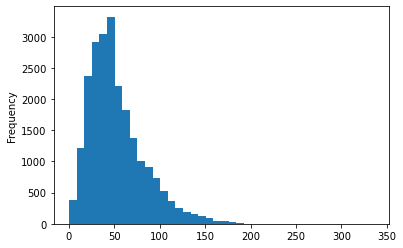

In [8]:
df['Length'].plot(bins=40, kind='hist') 

In [9]:
df.head()

,Libellé.Prescription,Avis.Pharmaceutique,PLT,Length
0,"CONTRAMAL 100 MG/ML, GOUTTES BUV (TRAMADOL)",indication,1,10
1,"IMOVANE 7.5 MG, CPR SÉCABLE (ZOPICLONE)",recommande imovane mg cp coucher eb,1,35
2,"COLCHICINE 1 MG, CPR SÉCABLE (COLCHICINE)",vue dfg recommande administrer mg donnees gpr ...,1,80
3,"PANTOPRAZOLE 40 MG, CPR GASTRO-RÉSISTANT (EUPA...",dose curative absence atcd gastrique retrouve ...,1,82
4,VANCOMYCINE 500 mg 1x/j,posologie infrat veuillez reevaluer posologie ...,0,64


#### XLNET 

In [10]:
#! pip uninstall torch torchvision -y
#! pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#! pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
#! pip install -U transformers
#! pip install -U simpletransformers 
# pip install torch

In [11]:
# splitting the data into training and eval dataset
X = df['Avis.Pharmaceutique']
y = df['PLT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_df = pd.DataFrame(X_train)
train_df['PLT'] = y_train

eval_df = pd.DataFrame(X_test)
eval_df['PLT'] = y_test

train_df.shape, eval_df.shape

((18512, 2), (4629, 2))

In [14]:
import pandas as pd
import logging
import sklearn
from sklearn.utils import class_weight
from simpletransformers.classification import ClassificationModel, ClassificationArgs


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [16]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights

C:\Users\murat\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=10762    0
20625    0
1191     0
18885    0
1695     0
        ..
7778     0
5590     0
15306    0
143      0
12318    0
Name: PLT, Length: 18512, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.60123417, 2.96952198])

In [17]:

model_args = ClassificationArgs(num_train_epochs=5,overwrite_output_dir=True,train_batch_size=32,max_seq_length=40)
# Create a ClassificationModel
model = ClassificationModel('xlnet', 'xlnet-base-cased', args=model_args,weight=[0.6,2.5]) # You can set class weights by using the optional weight argument

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

  0%|          | 0/18512 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlnet_40_2_2


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/579 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/579 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/579 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/579 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/579 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of xlnet model complete. Saved to outputs/.
C:\Users\murat\anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/4629 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlnet_40_2_2


Running Evaluation:   0%|          | 0/579 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7145251846958925, 'tp': 626, 'tn': 3616, 'fp': 234, 'fn': 153, 'auroc': 0.9576398312855309, 'auprc': 0.8484248977340285, 'acc': 0.916396629941672, 'eval_loss': 0.3879977490023379}


In [19]:
predictions, raw_outputs = model.predict(X_test.tolist())

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/4629 [00:00<?, ?it/s]

  0%|          | 0/579 [00:00<?, ?it/s]

In [20]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3850
           1       0.73      0.80      0.76       779

    accuracy                           0.92      4629
   macro avg       0.84      0.87      0.86      4629
weighted avg       0.92      0.92      0.92      4629

[[3616  234]
 [ 153  626]]


### Predictions with Validation DATA

In [117]:
df_val = pd.read_csv('valid_set.csv.gz',compression="gzip", sep=";")

In [118]:
df_val

,Libellé.Prescription,Avis.Pharmaceutique
0,perf NEFOPAM 60 mg (Acupan) + 1.25 DROPERIDOL ...,ASSOCIATION CONTRE INDIQUEE : SEROPLEX 20 MG C...
1,"LAMALINE, GÉLULE",Propose arrêt pendant hospitalisation ou DOLIP...
2,"XYZALL 5 MG, CPR","Non référencé aux HUS, propose CETIRIZINE 10MG..."
3,AMOXICILLINE + A.CLAVULANIQUE 1g x4/j (Augmentin),Il est recommandé de réduire la posologie en a...
4,"FELODIPINE LP 5 MG SANDOZ, CPR À LIBÉRATION PR...","Non référencé aux HUS, Substitué par amlodipin..."
...,...,...
4143,"COAPROVEL 300 MG/12.5 MG, CPR",= irbesartan 300 mg 1 comprimé par jour + hydr...
4144,"OXYCODONE LP 10 MG, CPR (OXYCONTIN)",Refusé pour le motif suivant : COMPRIMES NON S...
4145,"SKENAN LP 10 MG, GÉLULE (MORPHINE)",proposons ajout d'un laxatif préventif/curatif...
4146,"ACTISKENAN 10 MG, GÉLULE (MORPHINE)","si prise systématique, proposons ajout de sken..."


In [119]:
def clean_text (df):
    df.dropna(inplace=True)
    df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x : unidecode.unidecode(x)) # Remove é etc and ponctuation
    df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x : preprocess_text(x))
    df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].str.lower()
    df['Avis.Pharmaceutique'] = df['Avis.Pharmaceutique'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
    return df

In [120]:
df_val_t=clean_text(df_val)

In [121]:
df_val_t

,Libellé.Prescription,Avis.Pharmaceutique
0,perf NEFOPAM 60 mg (Acupan) + 1.25 DROPERIDOL ...,association indiquee seroplex mg cp droleptan ...
1,"LAMALINE, GÉLULE",propose arret hospitalisation doliprane mg gel...
2,"XYZALL 5 MG, CPR",reference hus propose cetirizine mg cp jour pr...
3,AMOXICILLINE + A.CLAVULANIQUE 1g x4/j (Augmentin),recommande reduire posologie acide clavulaniqu...
4,"FELODIPINE LP 5 MG SANDOZ, CPR À LIBÉRATION PR...",reference hus substitue amlodipine mg cp ad
...,...,...
4143,"COAPROVEL 300 MG/12.5 MG, CPR",irbesartan mg comprime jour hydrochlorothiazid...
4144,"OXYCODONE LP 10 MG, CPR (OXYCONTIN)",refuse motif comprimes secables proposons oxyc...
4145,"SKENAN LP 10 MG, GÉLULE (MORPHINE)",proposons ajout laxatif preventif curatif tp
4146,"ACTISKENAN 10 MG, GÉLULE (MORPHINE)",prise systematique proposons ajout skenan lp tp


In [122]:
predictions, raw_outputs = model.predict(df_val_t['Avis.Pharmaceutique'].tolist())

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/4074 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

In [123]:
pred = pd.DataFrame(predictions)

In [124]:
pred_b = pred.merge(df_val['Avis.Pharmaceutique'], on= df_val.index)
pred_b.drop('key_0',axis=1,inplace=True)
pred_b = pred_b.rename(columns={0:'Predictions'})

In [125]:
pred_b

,Predictions,Avis.Pharmaceutique
0,0,association indiquee seroplex mg cp droleptan ...
1,0,propose arret hospitalisation doliprane mg gel...
2,0,reference hus propose cetirizine mg cp jour pr...
3,1,recommande reduire posologie acide clavulaniqu...
4,0,reference hus substitue amlodipine mg cp ad
...,...,...
4069,0,irbesartan mg comprime jour hydrochlorothiazid...
4070,0,refuse motif comprimes secables proposons oxyc...
4071,0,proposons ajout laxatif preventif curatif tp
4072,0,prise systematique proposons ajout skenan lp tp


In [129]:
pred_b['Predictions'].value_counts()

0    3323
1     751
Name: Predictions, dtype: int64

In [126]:
pred_b.to_csv('Validation_prediction_XLNet')

In [127]:
pd.read_csv('Validation_prediction_XLNet')

,Unnamed: 0,Predictions,Avis.Pharmaceutique
0,0,0,association indiquee seroplex mg cp droleptan ...
1,1,0,propose arret hospitalisation doliprane mg gel...
2,2,0,reference hus propose cetirizine mg cp jour pr...
3,3,1,recommande reduire posologie acide clavulaniqu...
4,4,0,reference hus substitue amlodipine mg cp ad
...,...,...,...
4069,4069,0,irbesartan mg comprime jour hydrochlorothiazid...
4070,4070,0,refuse motif comprimes secables proposons oxyc...
4071,4071,0,proposons ajout laxatif preventif curatif tp
4072,4072,0,prise systematique proposons ajout skenan lp tp
